In [1]:
import numpy as np
from sympy import symbols
import math
import cmath 

import matplotlib as mpl
from matplotlib import pyplot as plt 

from scipy.stats import norm
import seaborn as sb 

import lmfit as lf
import scipy.optimize as opt 

from scipy.optimize import curve_fit 

In [2]:
N= 0.0269 #neutrons per picobarn/microAmp/day 
DA= 4 #cm squared 
r= 10 #cm 

In [3]:
r=np.linspace(1,10,10) 
print (r)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [4]:
#all SA with r  
SA= 4*math.pi*r**2
print (SA)

[  12.56637061   50.26548246  113.09733553  201.06192983  314.15926536
  452.38934212  615.7521601   804.24771932 1017.87601976 1256.63706144]


In [5]:
#Fractrion of Neutrons hitting for all
F=(DA/SA)*100 
print(F)

[31.83098862  7.95774715  3.53677651  1.98943679  1.27323954  0.88419413
  0.64961201  0.4973592   0.39297517  0.31830989]


In [6]:
#Counts 
# Detection efficiency values (0% to 100%)
detection_efficiency = np.arange(0, 101, 10)

# Values
pb = 10
uA = 100
days = 100
factor_30 = 0.0269 * .30 * pb * uA * days
factor_3 = 0.0269 * .03 * pb * uA * days

# Calculate expected detected counts for 30% and 3% geometric coverage
counts_30 = factor_30 * detection_efficiency/100
counts_3 = factor_3 * detection_efficiency/100 
print(counts_30)
print(counts_3)

[  0.   80.7 161.4 242.1 322.8 403.5 484.2 564.9 645.6 726.3 807. ]
[ 0.    8.07 16.14 24.21 32.28 40.35 48.42 56.49 64.56 72.63 80.7 ]


In [7]:
#Factor depending on distance 
# Values
pb = 10
uA = 100
days = 100
factor= 0.0269 * (F/100) * pb * uA * days 
print(factor)

[856.25359383 214.06339846  95.1392882   53.51584961  34.25014375
  23.78482205  17.47456314  13.3789624   10.57103202   8.56253594]


In [8]:
#Counts with efficiency at .154 
counts=factor * .154 
print(counts)

[131.86305345  32.96576336  14.65145038   8.24144084   5.27452214
   3.6628626    2.69108272   2.06036021   1.62793893   1.31863053]


[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


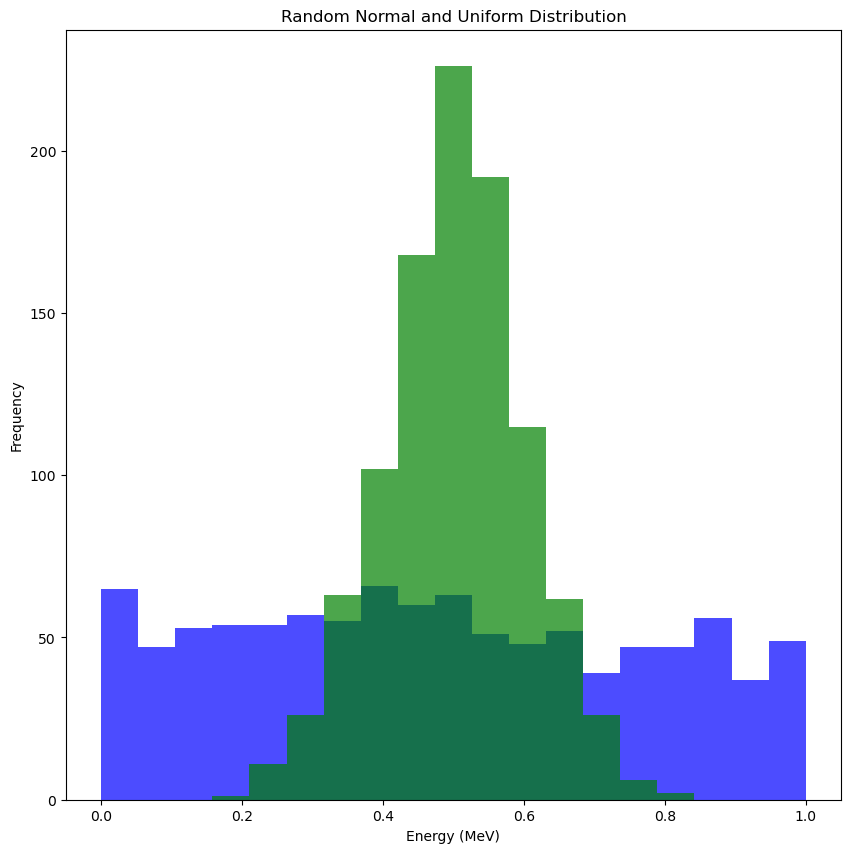

In [9]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, num_samples) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


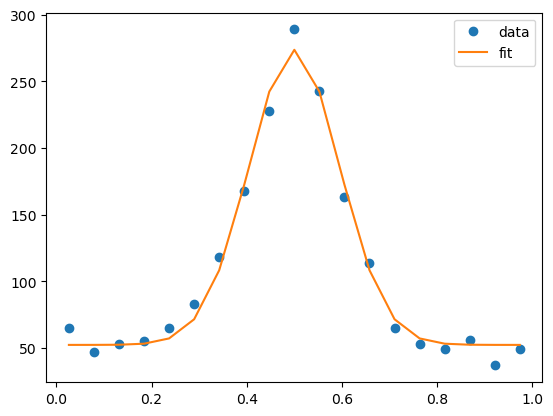

In [10]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


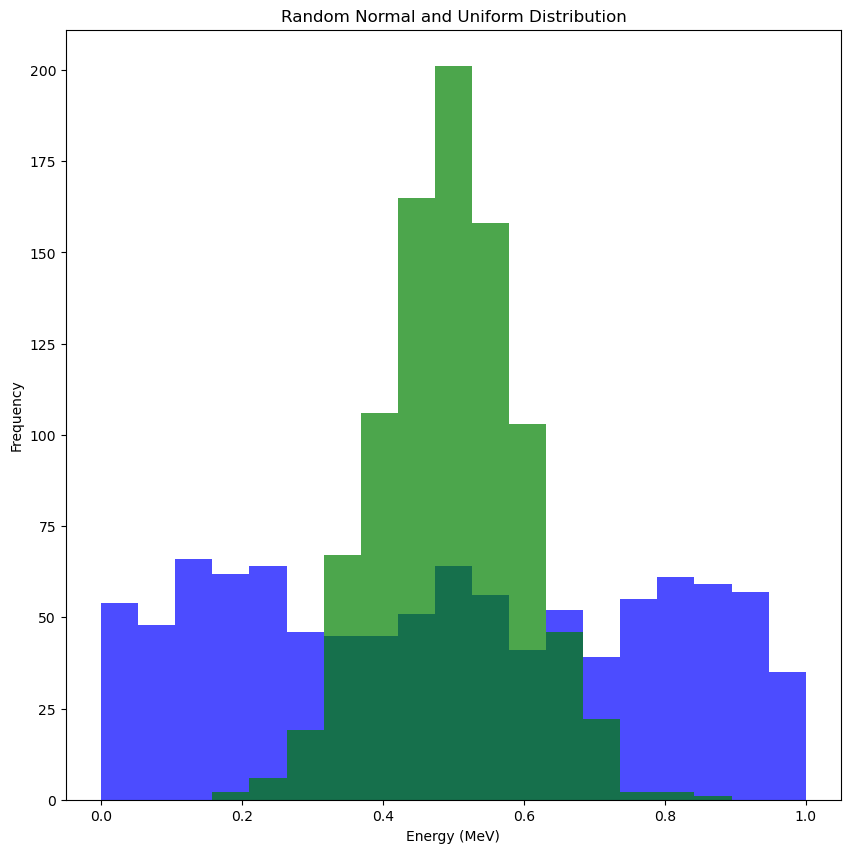

In [11]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 900) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


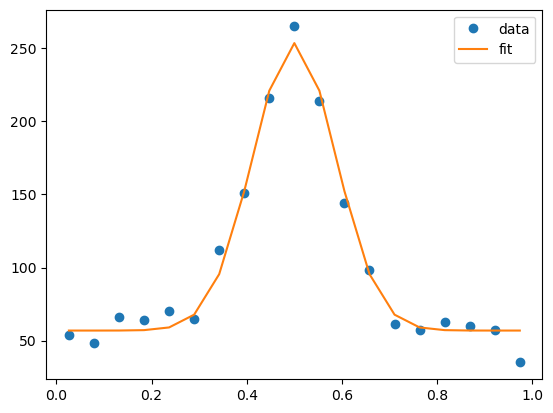

In [12]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


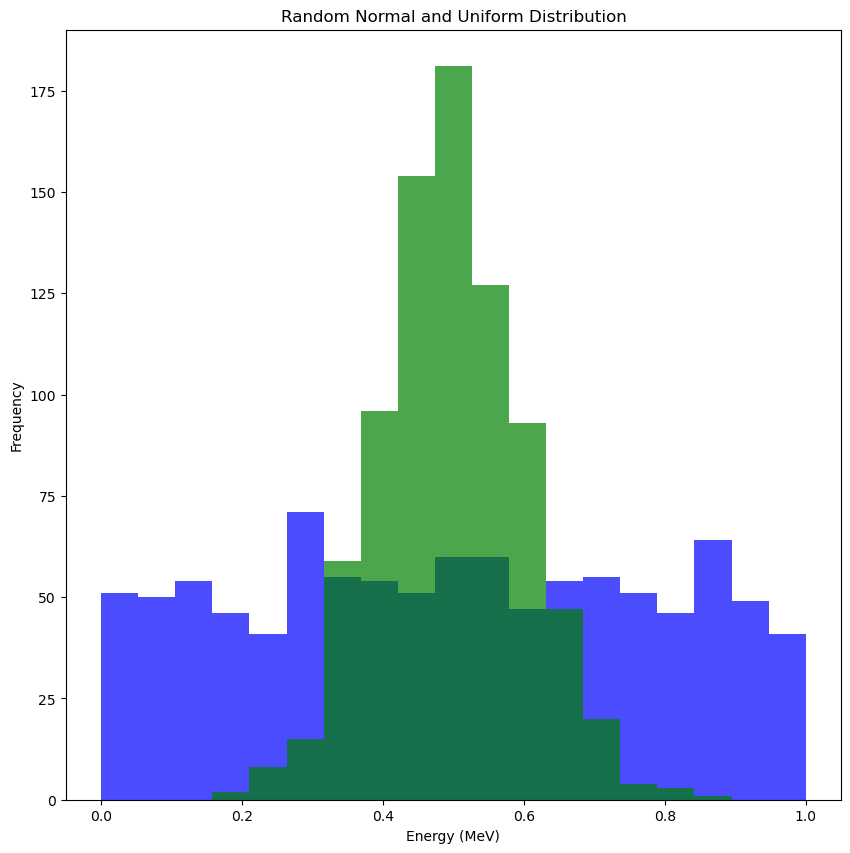

In [13]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 810) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


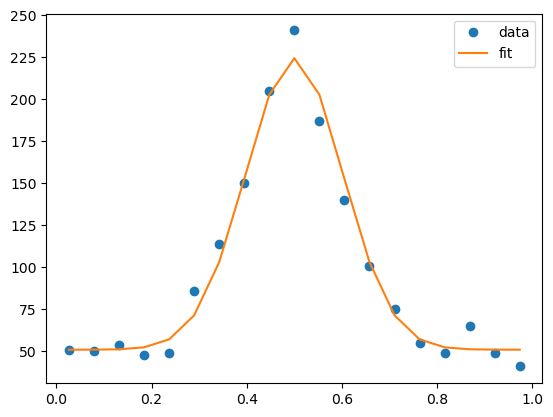

In [14]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


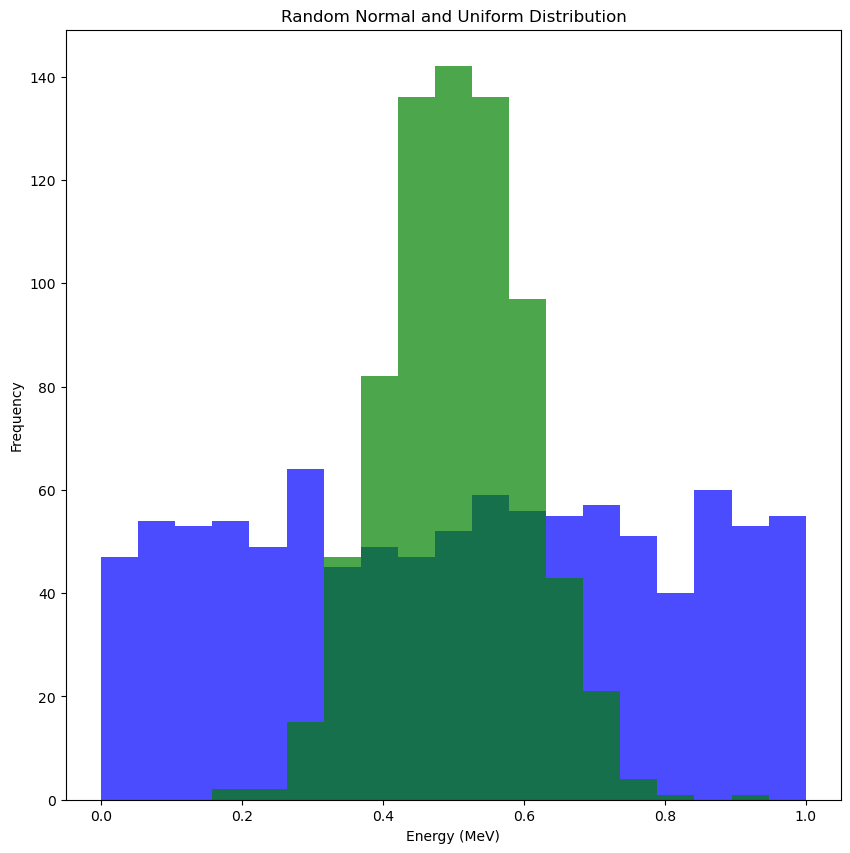

In [15]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 729) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


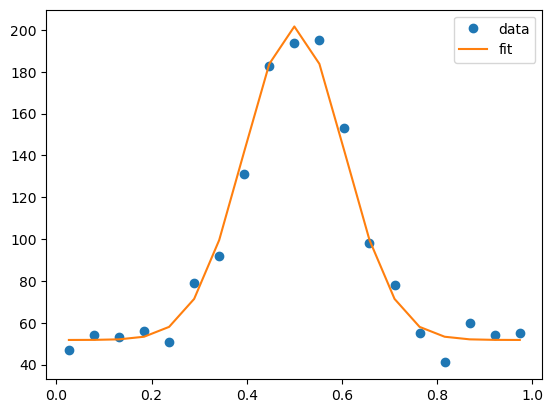

In [16]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


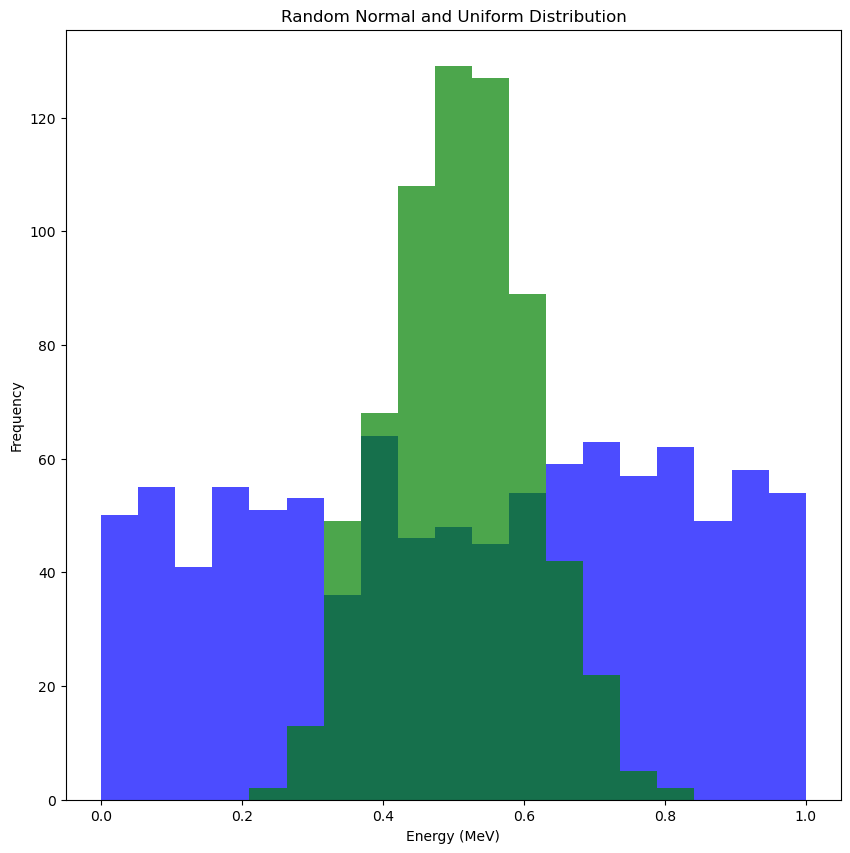

In [17]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 656) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


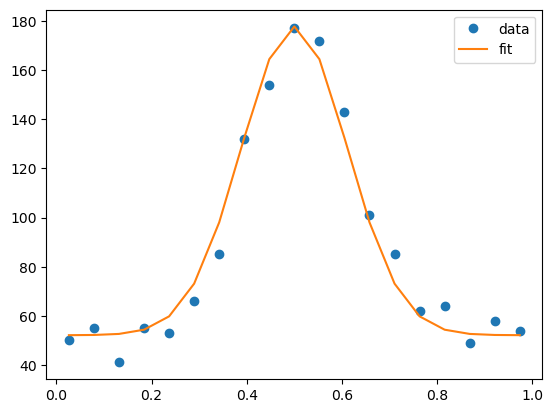

In [18]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


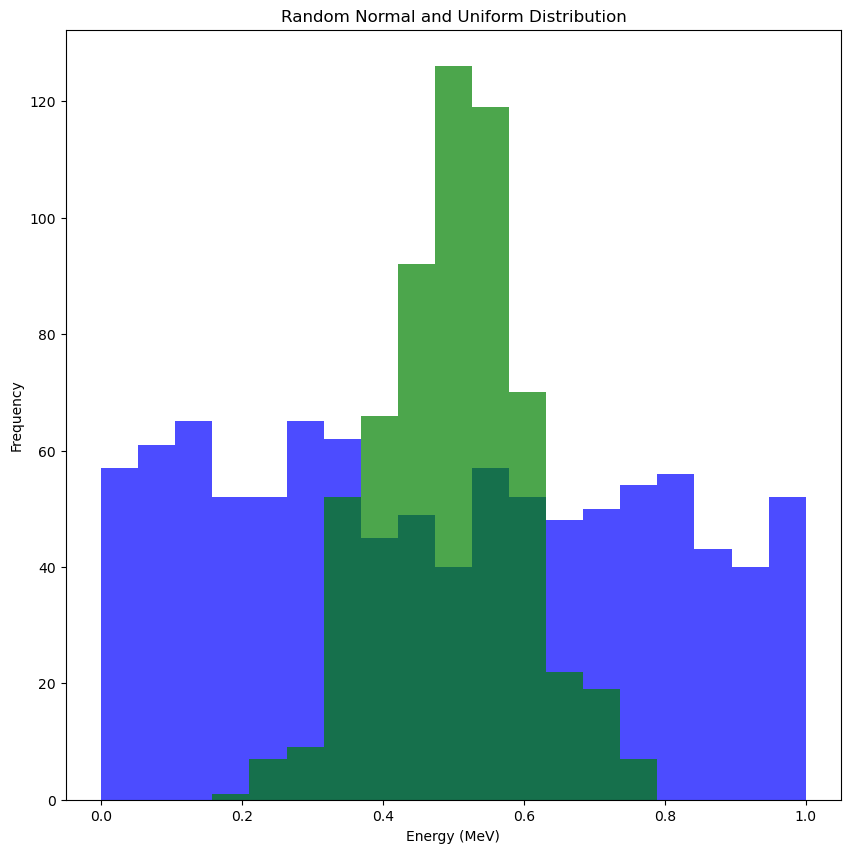

In [19]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 590) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


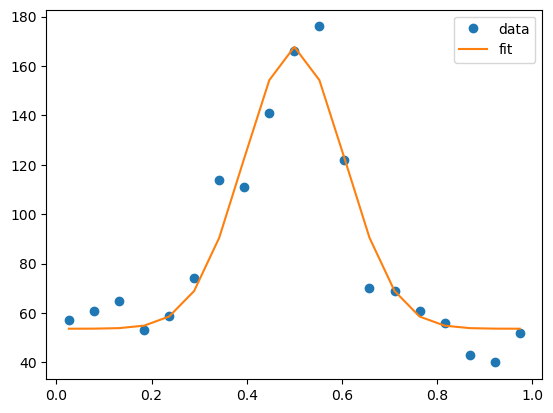

In [20]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


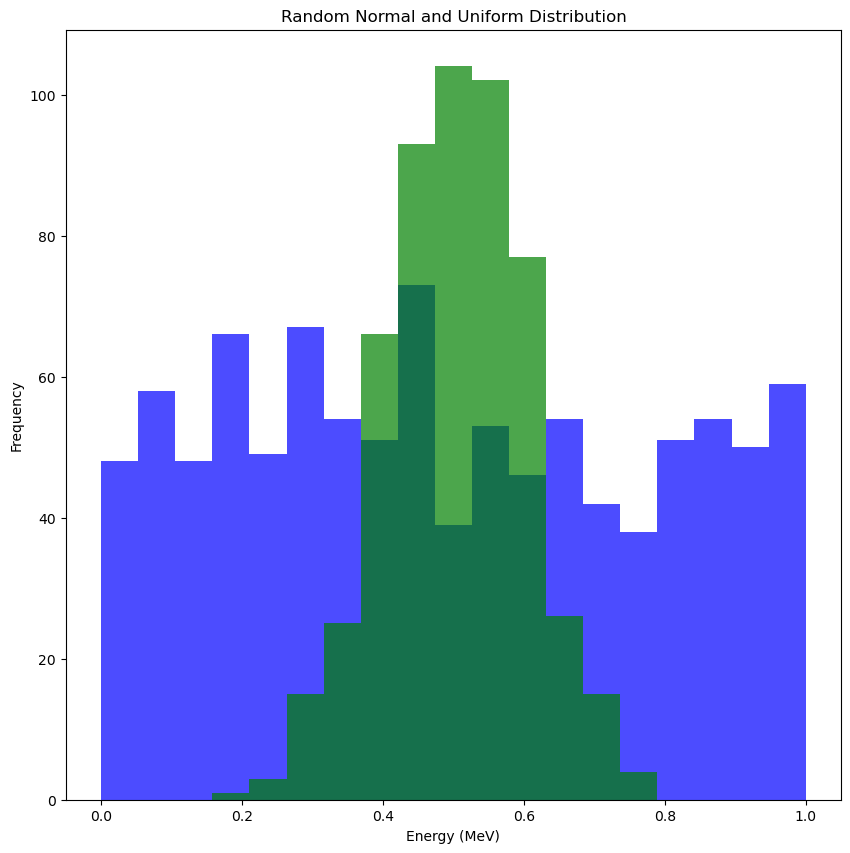

In [21]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 531) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


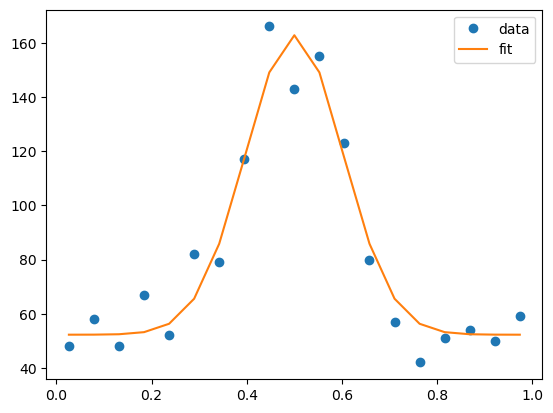

In [22]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


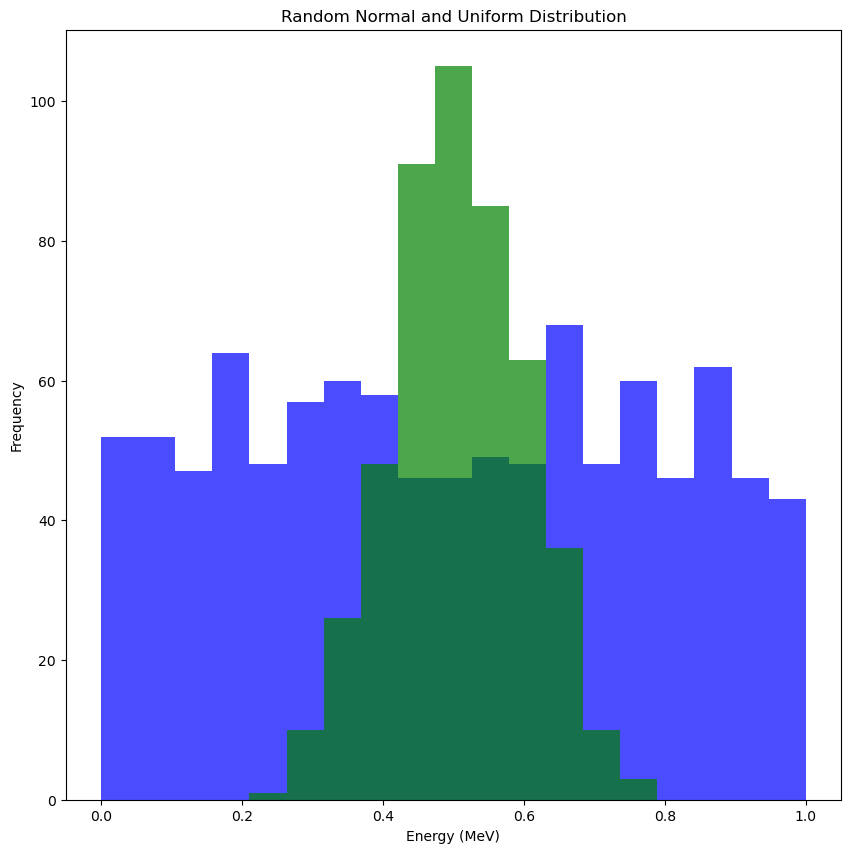

In [23]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 478) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


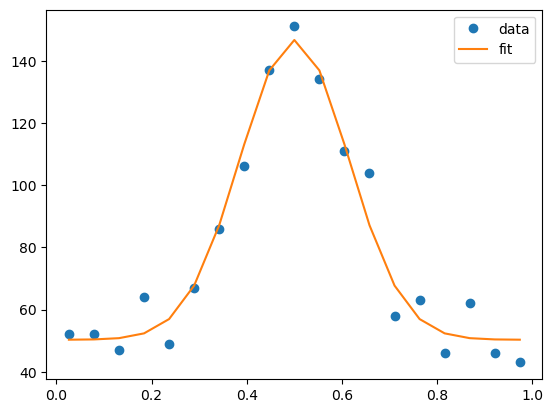

In [24]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


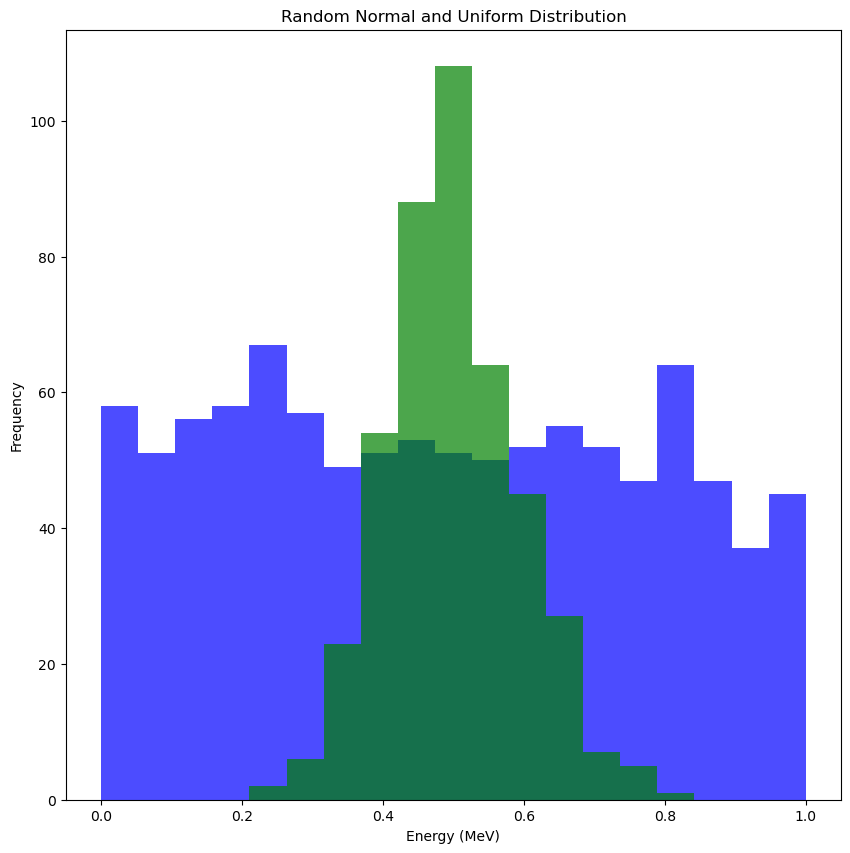

In [25]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 430) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


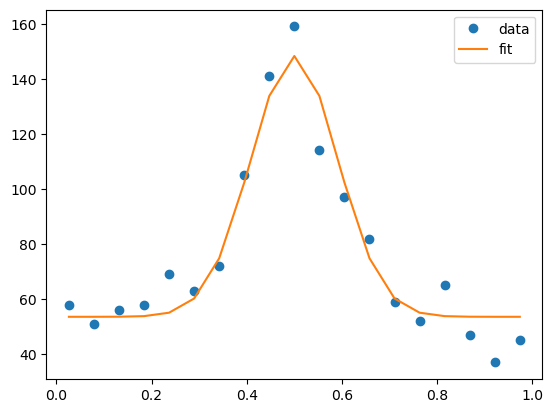

In [26]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


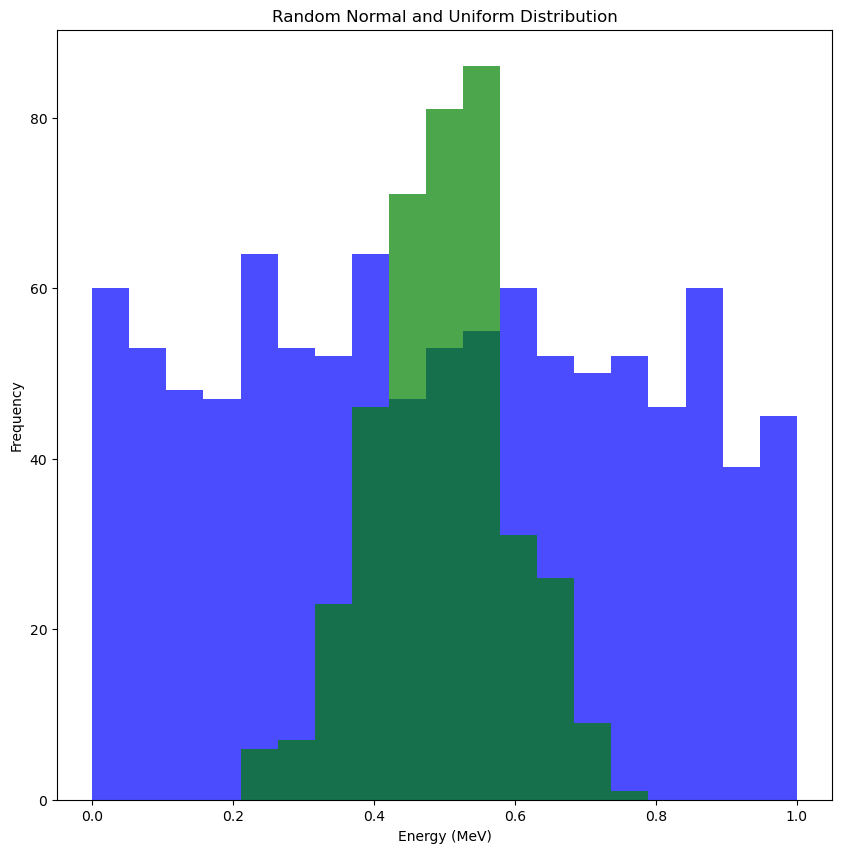

In [27]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 387) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


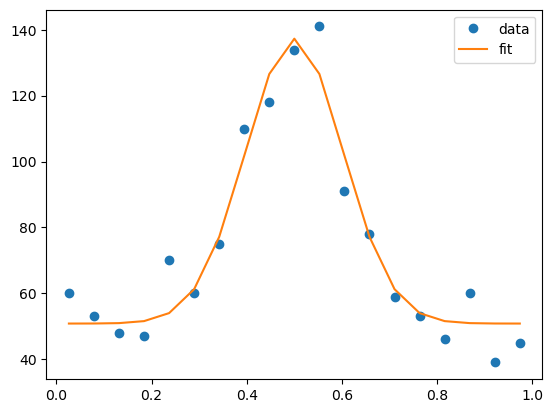

In [28]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


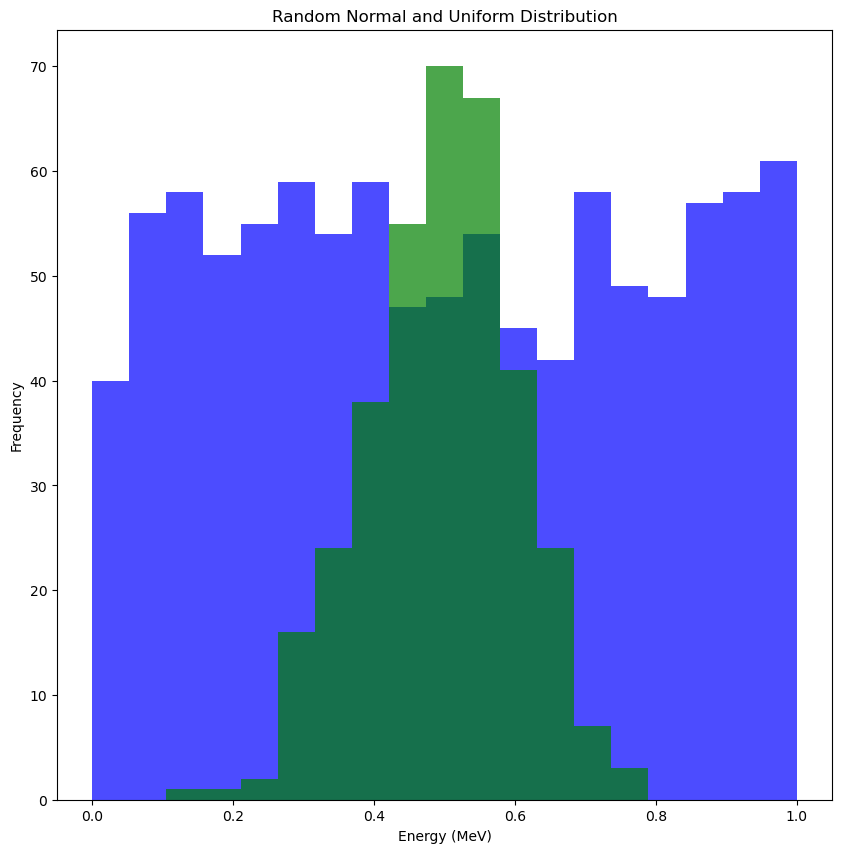

In [29]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 349) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


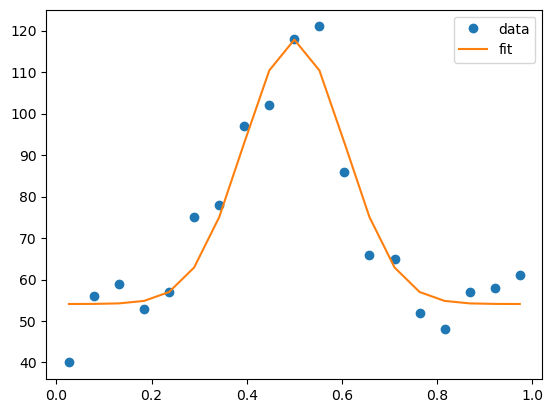

In [30]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


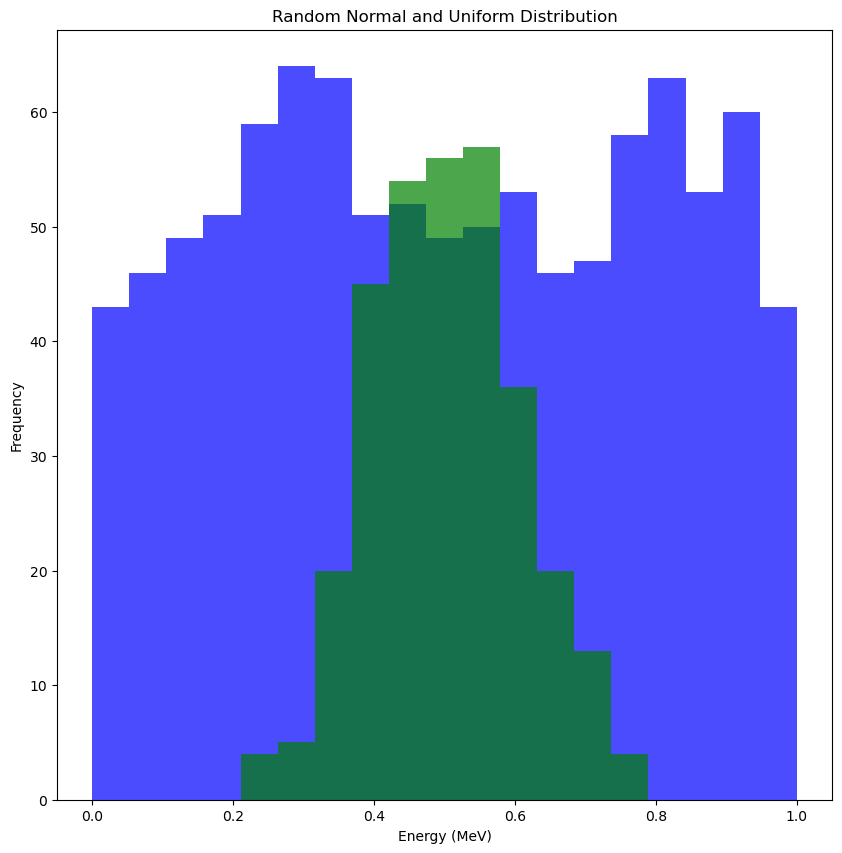

In [31]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 314) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


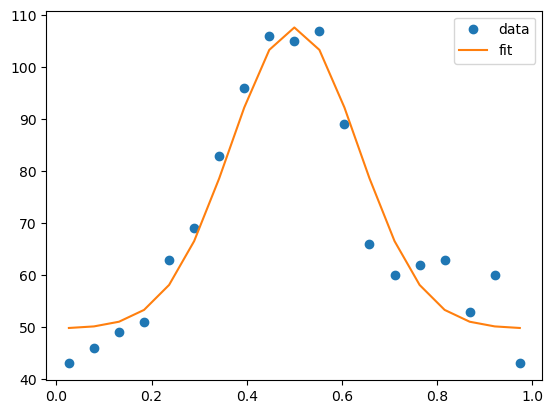

In [32]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


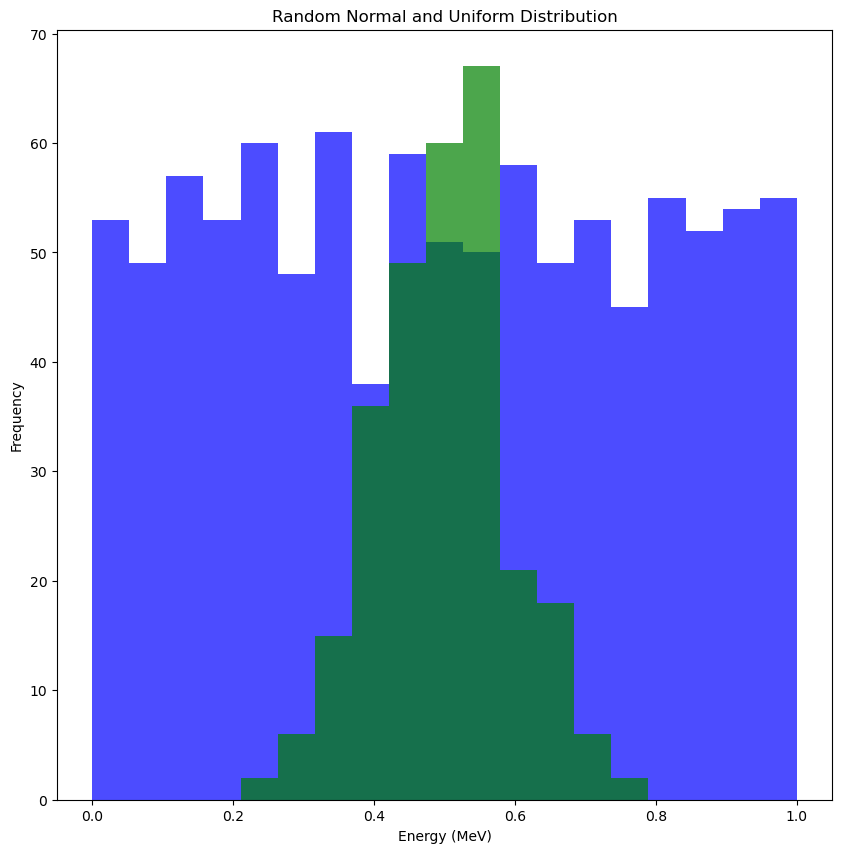

In [33]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 282) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


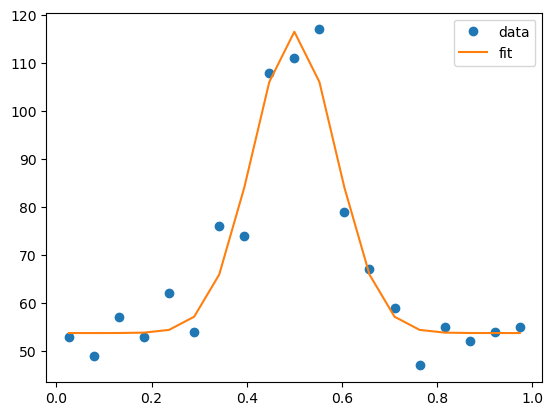

In [34]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


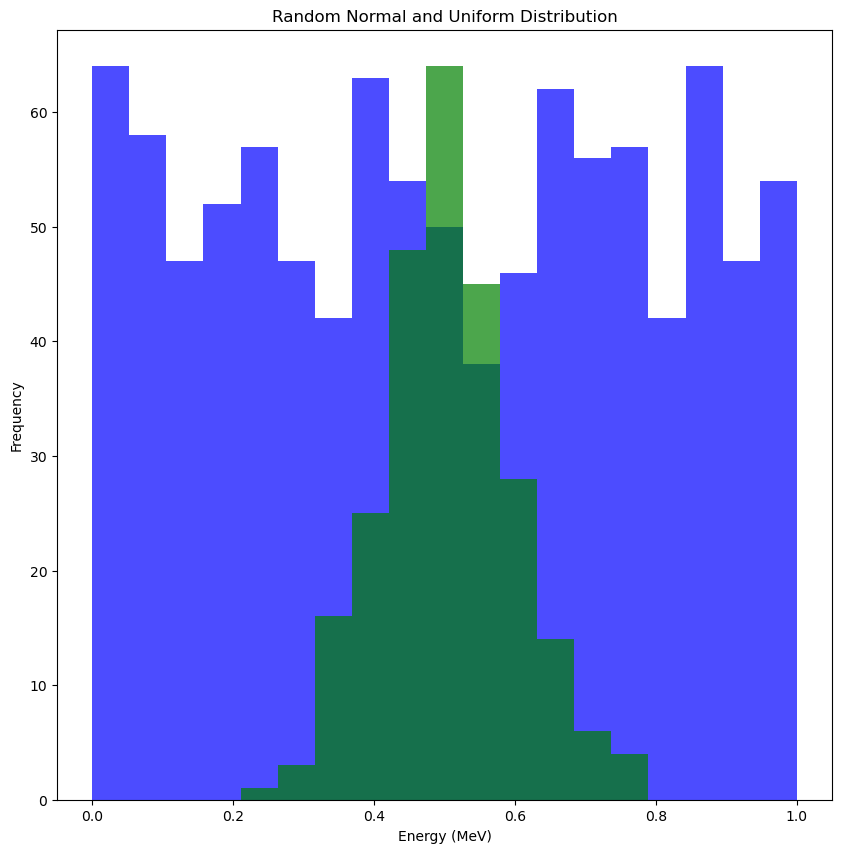

In [35]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 254) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


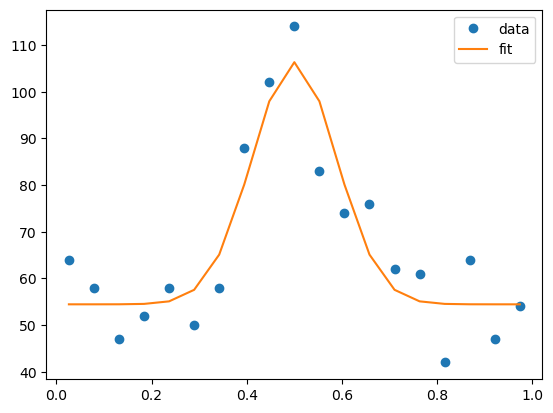

In [36]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


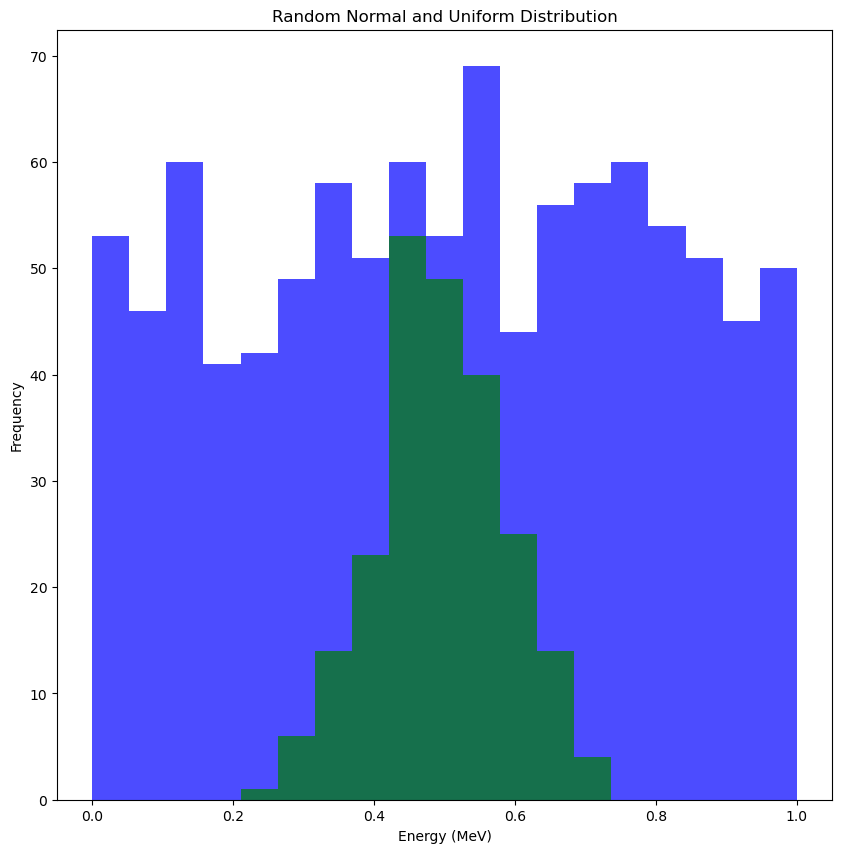

In [37]:
#Histogram 
num_samples=1000

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, 229) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


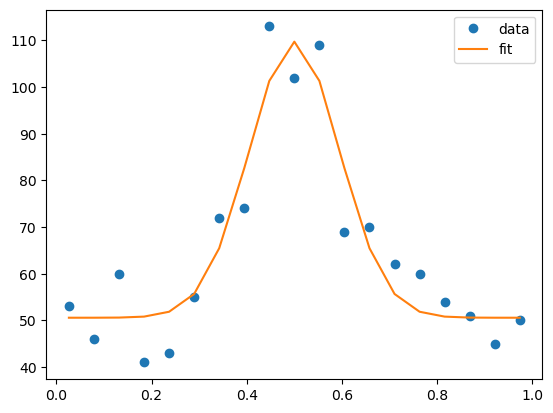

In [38]:
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

# Changing Standard Deviation

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


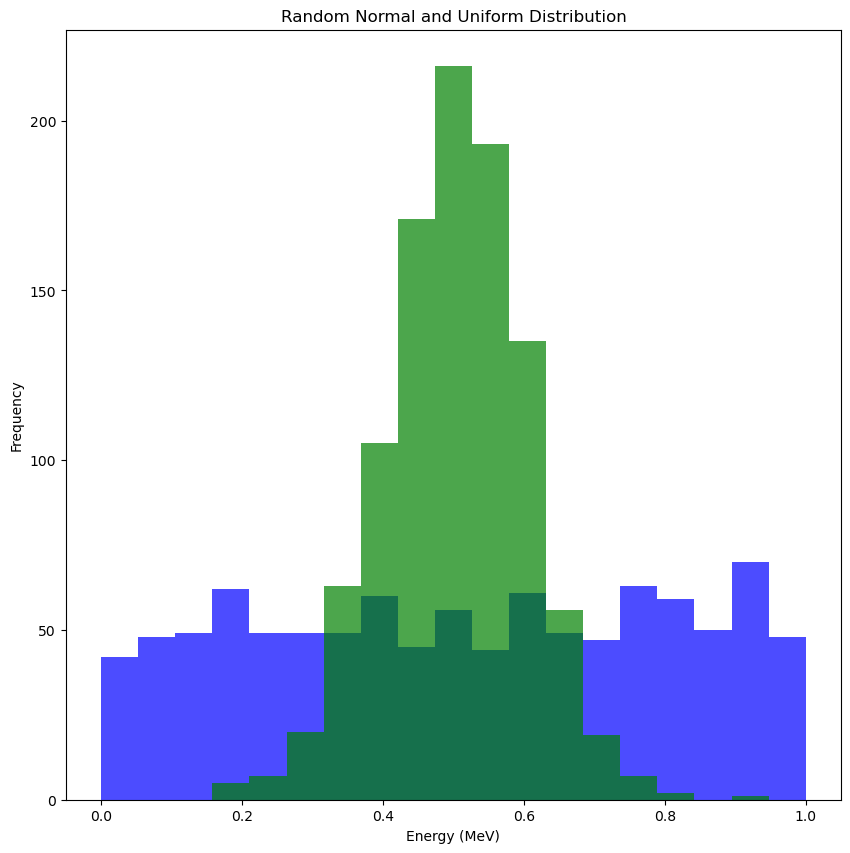

In [39]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.1
N=np.random.normal(mean_energy, std_deviation, num_samples) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


(0.0, 300.0)

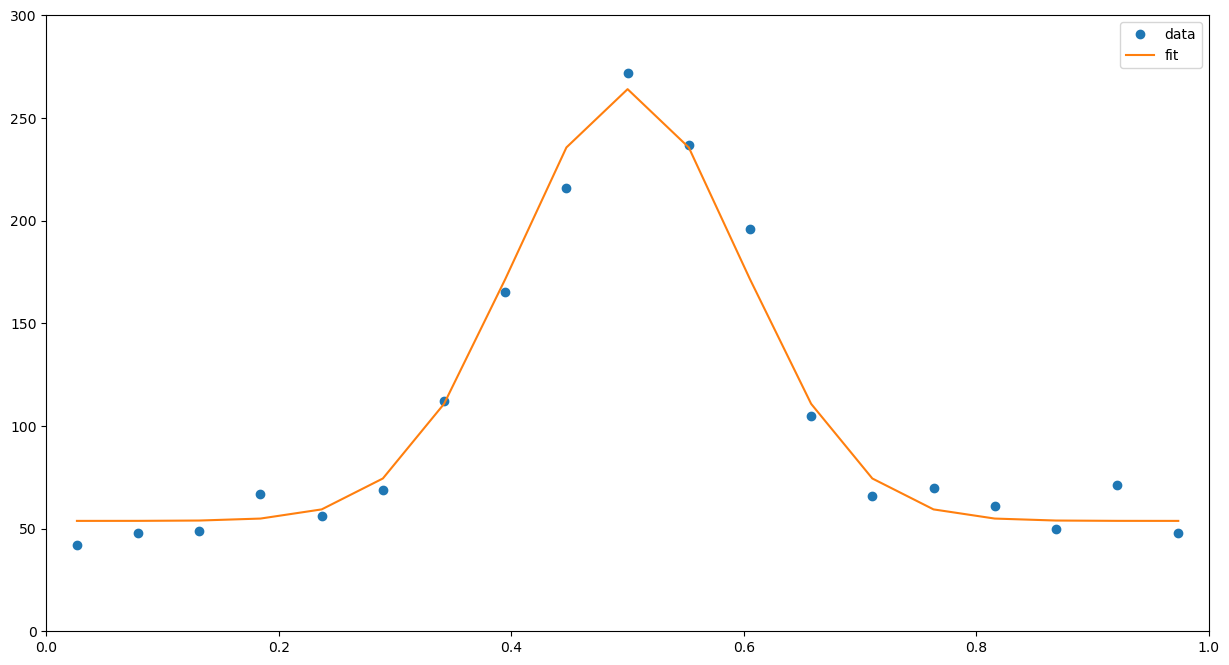

In [40]:
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend() 


ax1.set_xlim(0, 1) 
ax1.set_ylim(0,300)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


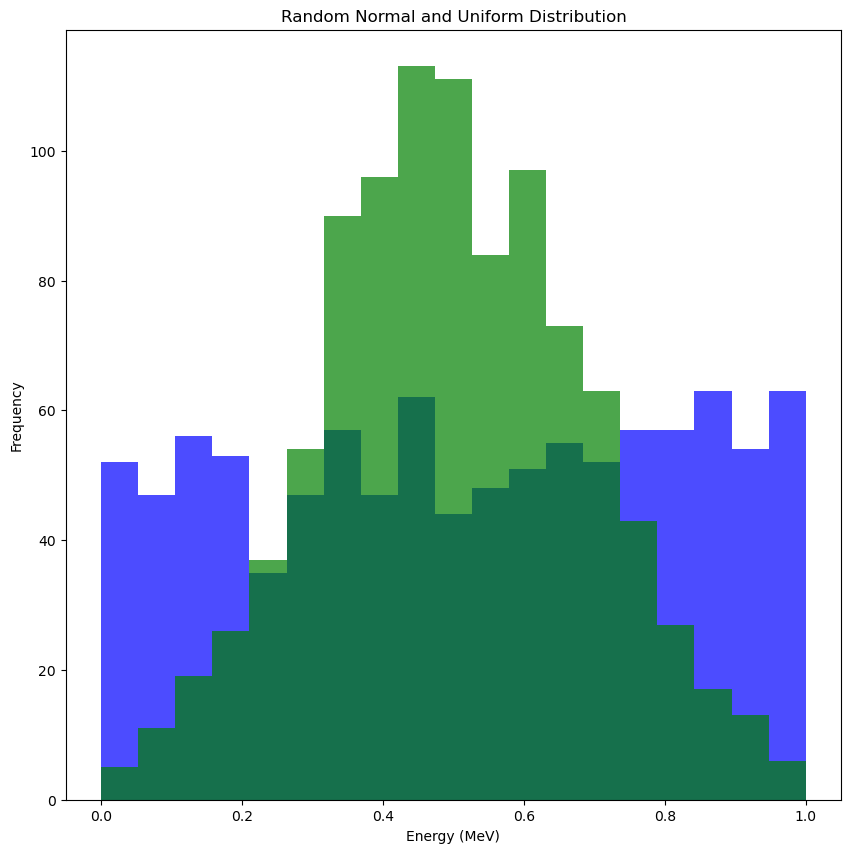

In [41]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.2
N=np.random.normal(mean_energy, std_deviation, num_samples) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


(0.0, 300.0)

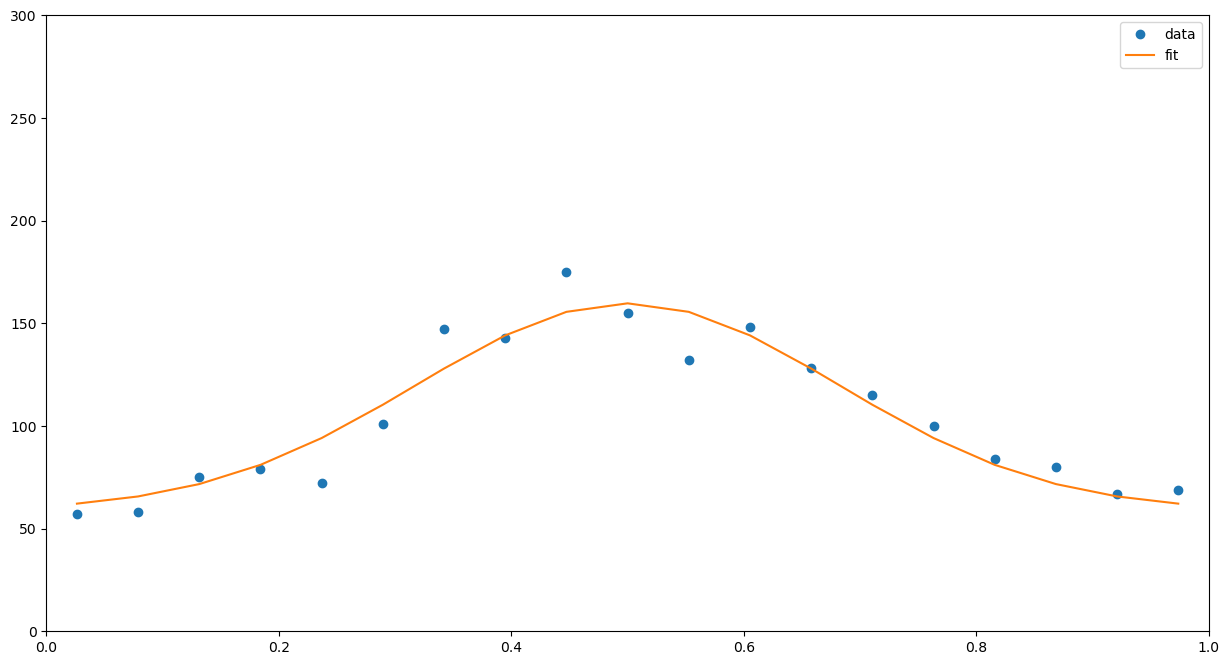

In [42]:
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend()

ax1.set_xlim(0, 1) 
ax1.set_ylim(0,300)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


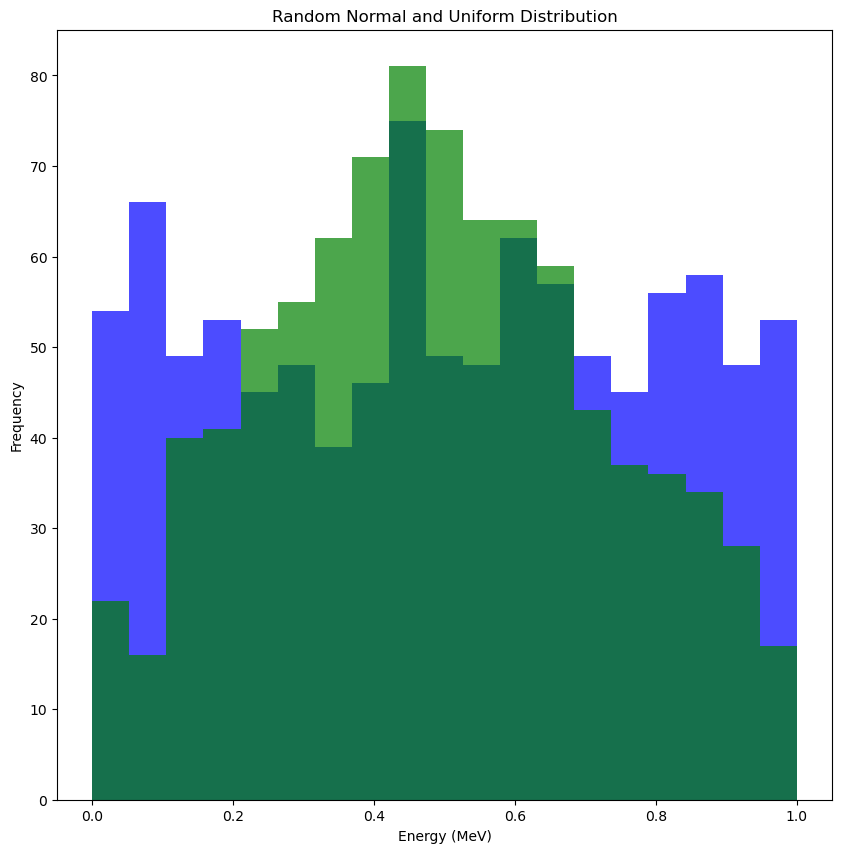

In [43]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.3
N=np.random.normal(mean_energy, std_deviation, num_samples) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


(0.0, 300.0)

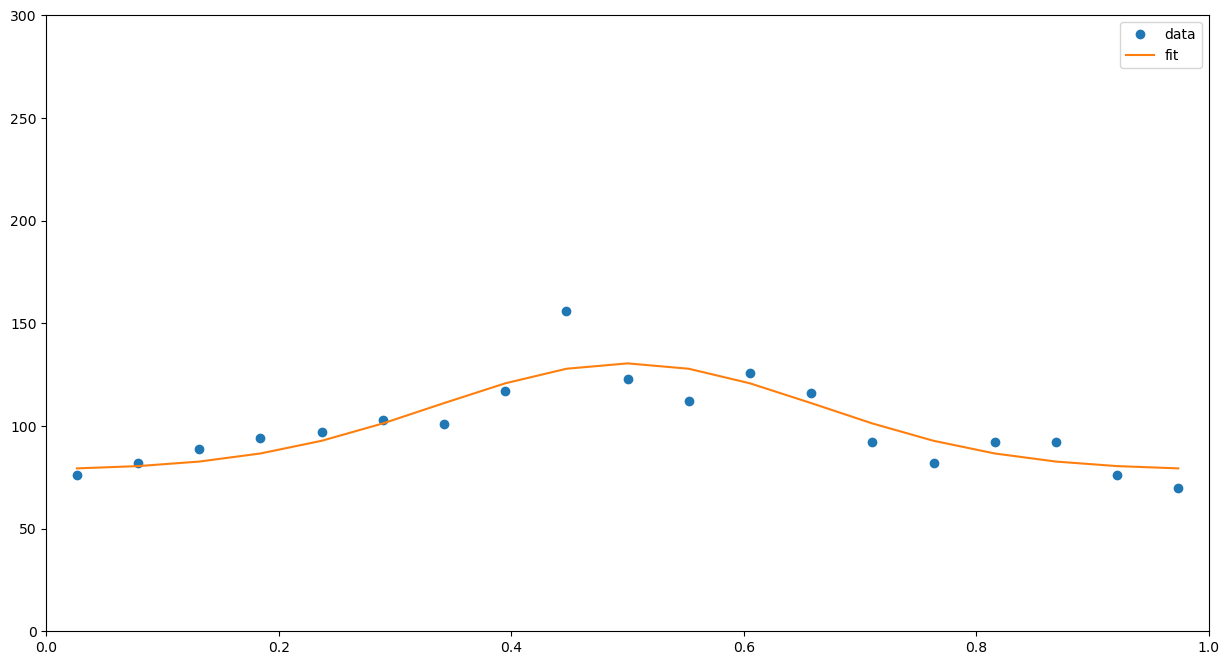

In [44]:
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend() 

ax1.set_xlim(0, 1) 
ax1.set_ylim(0,300)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


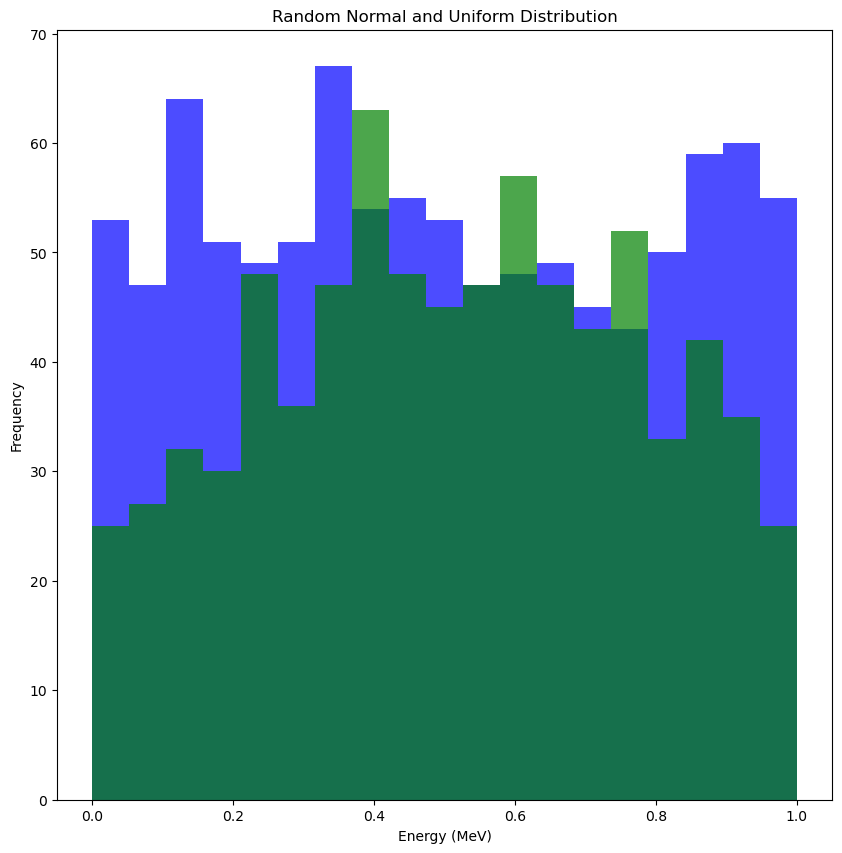

In [45]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.4
N=np.random.normal(mean_energy, std_deviation, num_samples) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


(0.0, 300.0)

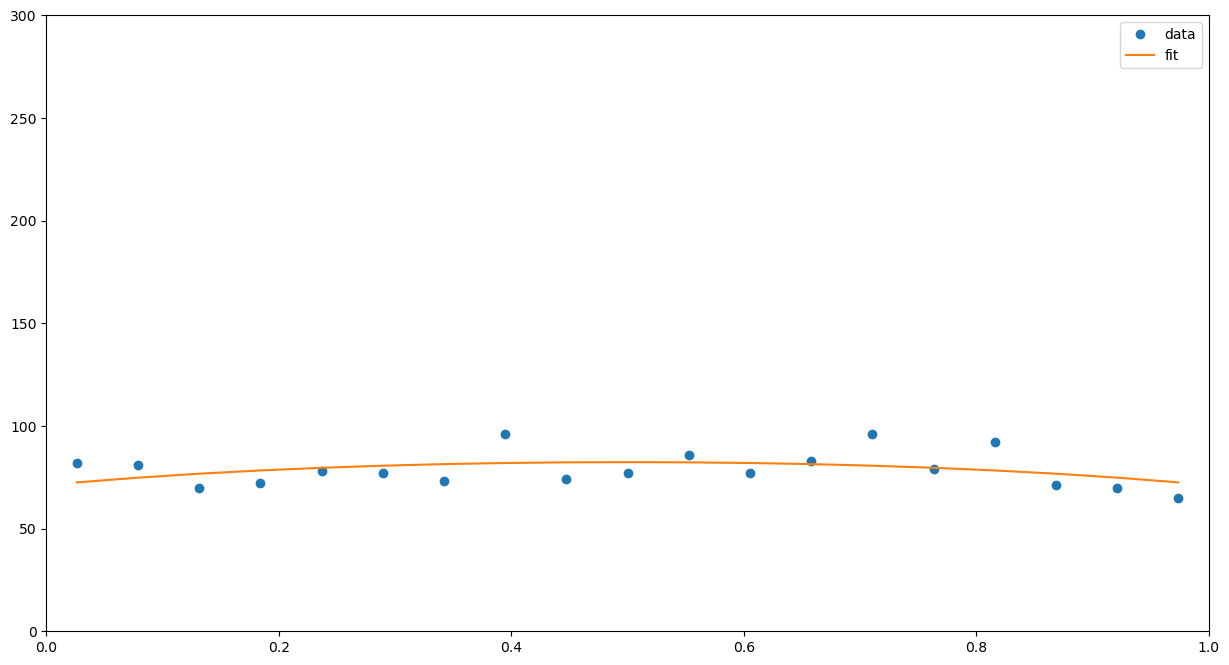

In [53]:
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend() 

ax1.set_xlim(0, 1) 
ax1.set_ylim(0,300)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


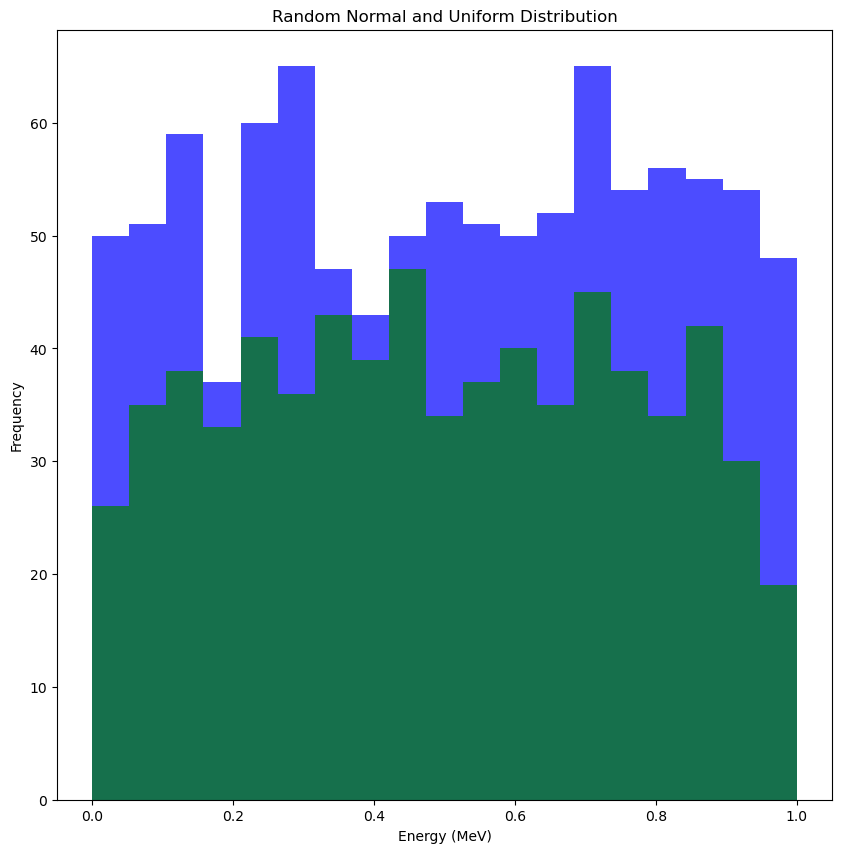

In [47]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.5
N=np.random.normal(mean_energy, std_deviation, num_samples) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


(0.0, 300.0)

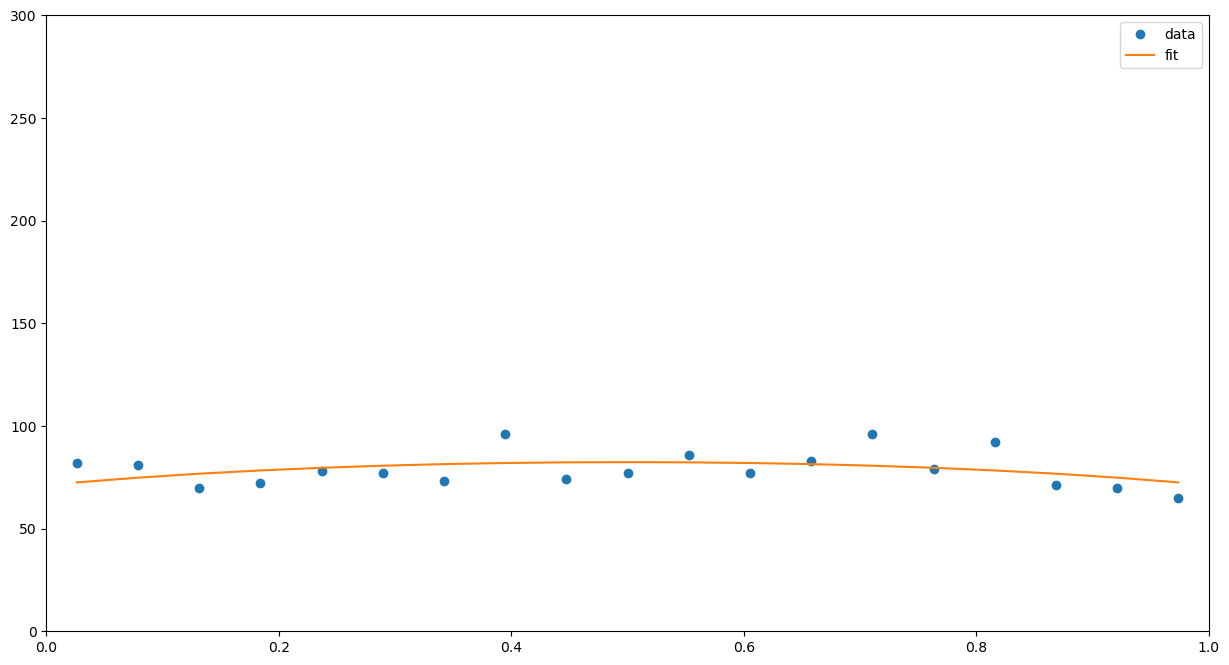

In [54]:
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend() 

ax1.set_xlim(0, 1) 
ax1.set_ylim(0,300)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


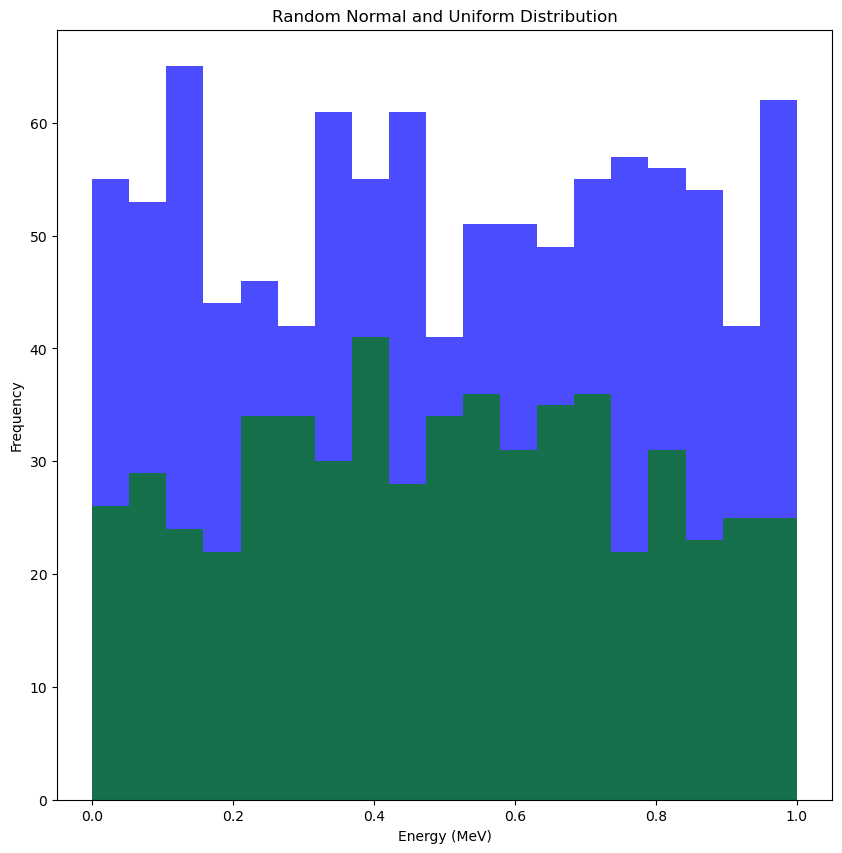

In [49]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.6
N=np.random.normal(mean_energy, std_deviation, num_samples) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


(0.0, 300.0)

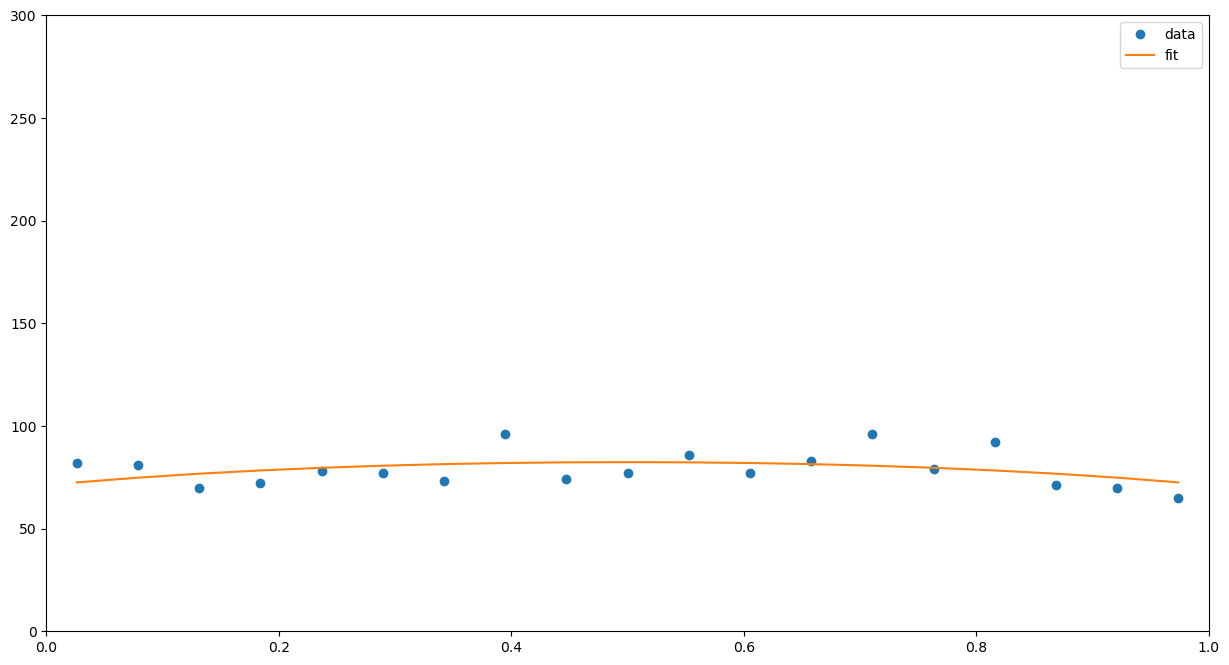

In [55]:
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend() 

ax1.set_xlim(0, 1) 
ax1.set_ylim(0,300)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.02631579 0.07894737 0.13157895 0.18421053 0.23684211 0.28947368
 0.34210526 0.39473684 0.44736842 0.5        0.55263158 0.60526316
 0.65789474 0.71052632 0.76315789 0.81578947 0.86842105 0.92105263
 0.97368421]


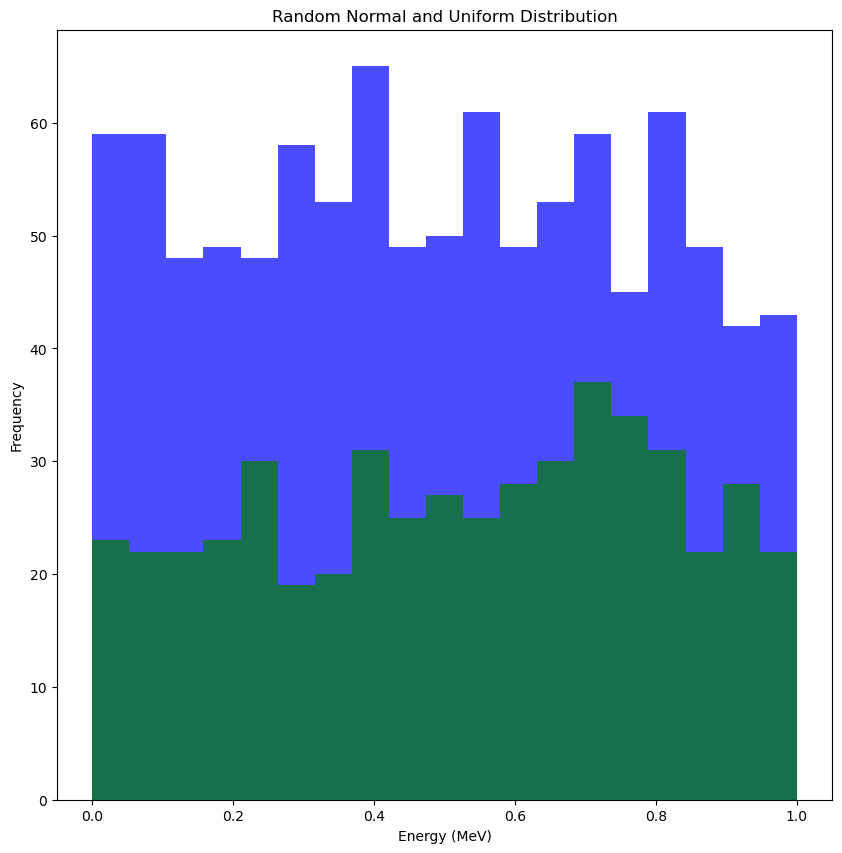

In [51]:
#Histogram 
num_samples=1000 

U= np.random.uniform(0, 1, num_samples) 

mean_energy = 0.5
std_deviation = 0.7
N=np.random.normal(mean_energy, std_deviation, num_samples) 


fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
n2 =plt.hist(U, bins=np.linspace(0,1,20), color='blue', alpha=0.7)
print(n2[1]) 
xcq2 = (n2[1][:-1] + n2[1][1:]) / 2 
print(xcq2)

n=plt.hist(N, bins=np.linspace(0,1,20), color='green', alpha=0.7) 
print(n[1]) 
xcq = (n[1][:-1] + n[1][1:]) / 2 
print(xcq) 

ymin = 0
ymax = 150

plt.title('Random Normal and Uniform Distribution')
plt.xlabel('Energy (MeV)')
plt.ylabel('Frequency') 

plt.show()

(19,)
(19,)
(19,)
(19,)
0.4999999999999999


(0.0, 300.0)

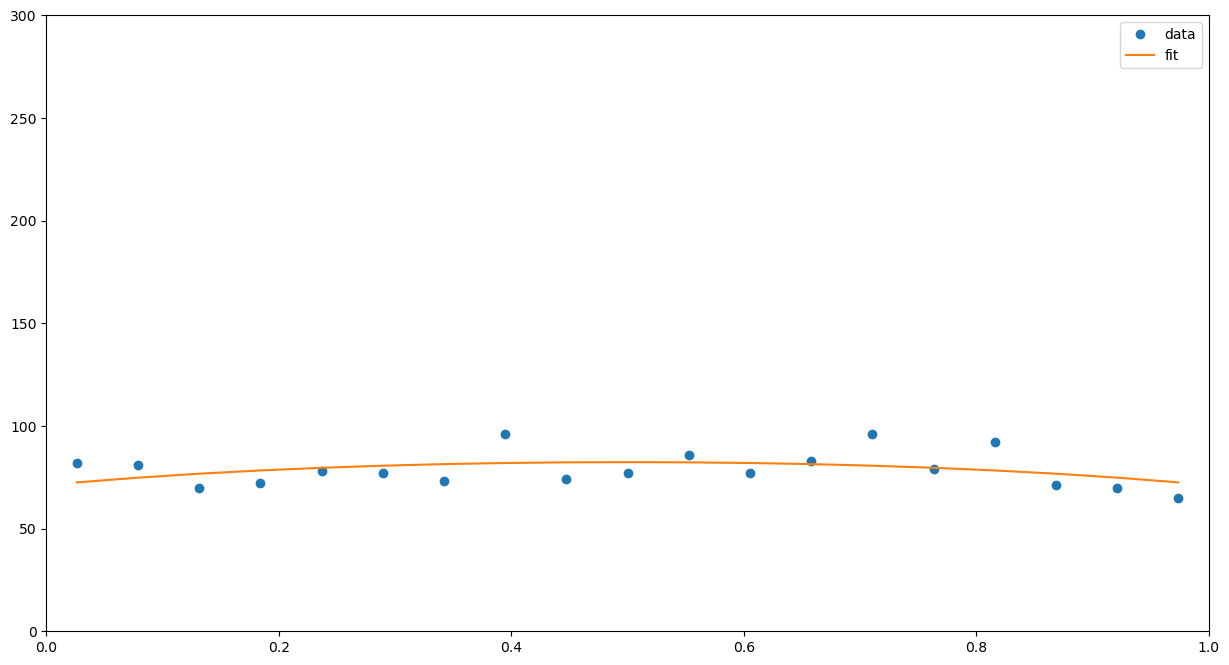

In [52]:
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes
#for Gauss's law
# f(x)=Ae^-((x-u)^2)/2o^2 

#Normal
xdata= xcq 
print(np.shape(xdata))
ydata= n[0]
print(np.shape(ydata))
#plt.plot(xdata, ydata, 'o') 

#uniform 
xdata2= xcq2 
print(np.shape(xdata2))
ydata2= n2[0]
print(np.shape(ydata2))
#plt.plot(xdata2, ydata2, 'bo') 

#uniform Function
def lin(x,b): 
    y2=xdata2+b
    return y2 
m=np.mean(xdata2) 
print(m)
b=m

# Define the Gaussian function
def Gauss(x, A, B, C):
    y = A*np.exp(-1*B*(x-.5)**2)+C
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata+ydata2)

fit_A = parameters[0]
fit_B = parameters[1] 
fit_C = parameters[2]
  
fit_y = Gauss(xdata, fit_A, fit_B,fit_C) 
#fit_y2 = lin(xdata2,b)
plt.plot(xdata, ydata+ydata2, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit') 
#plt.plot(xdata2, ydata2, 'k') 
#plt.plot(xdata2, fit_y2, '-', label='fit2') 
plt.legend() 

ax1.set_xlim(0, 1) 
ax1.set_ylim(0,300)